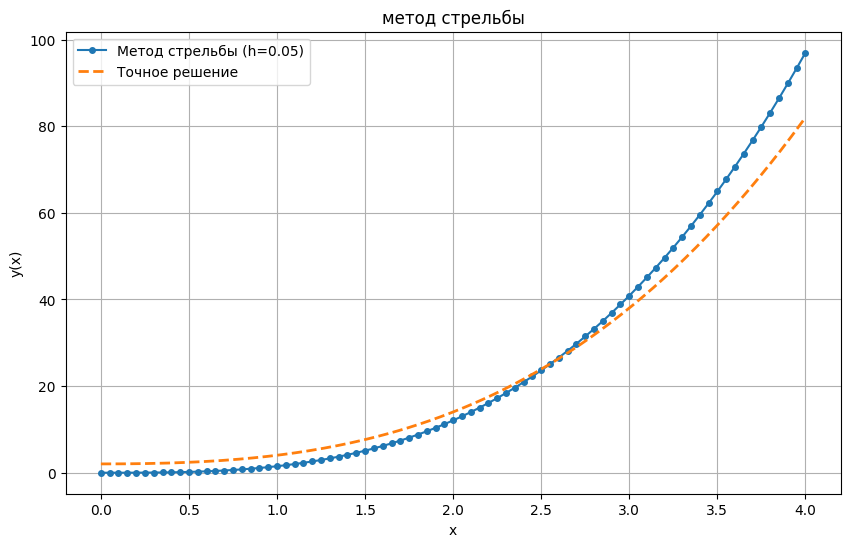

Сравнение решений на сетке h=0.1:
x =  0.0 | y_точн =  2.00000 | y_числ = -0.07171 | абс. ош. = 2.07e+00 | Р-Р ош. = 2.58e-03
x =  0.1 | y_точн =  2.01100 | y_числ = -0.07040 | абс. ош. = 2.08e+00 | Р-Р ош. = 2.58e-03
x =  0.2 | y_точн =  2.04800 | y_числ = -0.05994 | абс. ош. = 2.11e+00 | Р-Р ош. = 2.56e-03
x =  0.3 | y_точн =  2.11700 | y_числ = -0.03044 | абс. ош. = 2.15e+00 | Р-Р ош. = 2.46e-03
x =  0.4 | y_точн =  2.22400 | y_числ =  0.02800 | абс. ош. = 2.20e+00 | Р-Р ош. = 2.23e-03
x =  0.5 | y_точн =  2.37500 | y_числ =  0.12526 | абс. ош. = 2.25e+00 | Р-Р ош. = 1.83e-03
x =  0.6 | y_точн =  2.57600 | y_числ =  0.27123 | абс. ош. = 2.30e+00 | Р-Р ош. = 1.20e-03
x =  0.7 | y_точн =  2.83300 | y_числ =  0.47579 | абс. ош. = 2.36e+00 | Р-Р ош. = 2.82e-04
x =  0.8 | y_точн =  3.15200 | y_числ =  0.74882 | абс. ош. = 2.40e+00 | Р-Р ош. = 9.66e-04
x =  0.9 | y_точн =  3.53900 | y_числ =  1.10021 | абс. ош. = 2.44e+00 | Р-Р ош. = 2.60e-03
x =  1.0 | y_точн =  4.00000 | y_числ =  1.539

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(a, b, h):
  points = []
  current = a
  while current < b:
    points.append(current)
    current += h
  points.append(b)
  return points

def runge_romberg(y_h, y_h2, p):
  return [abs(yh - yh2) / (2**p - 1) for yh, yh2 in zip(y_h, y_h2)]

# Правая часть уравнения: y'' = [4(x^2+3)y' - 6x y] / [x(x^2+6)]
def f(x, y1, y2):
  if abs(x) < 1e-12:
    return -y1
  return (4 * (x**2 + 3) * y2 - 6 * x * y1) / (x * (x**2 + 6))

def exact_solution(x):
  return x**3 + x**2 + 2

def runge_kutta_method(a, b, h, y1_0, y2_0):
  xs = generate_points(a, b, h)
  y1s = [y1_0]
  y2s = [y2_0]
  for i in range(1, len(xs)):
    x = xs[i - 1]
    y1 = y1s[-1]
    y2 = y2s[-1]

    k1 = h * y2
    l1 = h * f(x, y1, y2)

    k2 = h * (y2 + l1 / 2)
    l2 = h * f(x + h / 2, y1 + k1 / 2, y2 + l1 / 2)

    k3 = h * (y2 + l2 / 2)
    l3 = h * f(x + h / 2, y1 + k2 / 2, y2 + l2 / 2)

    k4 = h * (y2 + l3)
    l4 = h * f(x + h, y1 + k3, y2 + l3)

    y1_next = y1 + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    y2_next = y2 + (l1 + 2 * l2 + 2 * l3 + l4) / 6

    y1s.append(y1_next)
    y2s.append(y2_next)

  return xs, y1s, y2s


def shooting_method(h, beta, a=0, b=4):
  def phi(s):
    xs, y1s, y2s = runge_kutta_method(a, b, h, y1_0=s, y2_0=0.0)
    y_b = y1s[-1]
    y_prime_b = y2s[-1]
    return y_b - y_prime_b - beta

  s0, s1 = 0.0, 5.0
  for iter_count in range(20):
    f0, f1 = phi(s0), phi(s1)
    if abs(f1) < 1e-12:
      break
    s2 = s1 - f1 * (s1 - s0) / (f1 - f0)
    s0, s1 = s1, s2

  xs, y1s, y2s = runge_kutta_method(a, b, h, y1_0=s1, y2_0=0.0)
  return iter_count, xs, y1s, s1

h1 = 0.1
h2 = h1 / 2

iter1, x1, y1, s1 = shooting_method(h1, beta=26)
iter2, x2, y2, s2 = shooting_method(h2, beta=26)

y2_on_h1_grid = [y2[i] for i in range(0, len(y2), 2)]
rr_error = runge_romberg(y1, y2_on_h1_grid, p=4)

x_exact = np.linspace(0, 4, 200)
y_exact = exact_solution(x_exact)

plt.figure(figsize=(10, 6))
plt.plot(x2[:-1], y2[:-1], 'o-', label='Метод стрельбы (h=0.05)', markersize=4)
plt.plot(x_exact, y_exact, '--', label='Точное решение', linewidth=2)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('метод стрельбы')
plt.grid(True)
plt.legend()
plt.show()

print("Сравнение решений на сетке h=0.1:")
for i in range(len(x1)):
  x_val = x1[i]
  y_num = y1[i]
  y_true = exact_solution(x_val)
  abs_err = abs(y_true - y_num)
  rr_est = rr_error[i] if i < len(rr_error) else float('nan')
  print(f"x = {x_val:4.1f} | y_точн = {y_true:8.5f} | y_числ = {y_num:8.5f} | "
      f"абс. ош. = {abs_err:.2e} | Р-Р ош. = {rr_est:.2e}")


In [ ]:
from numba import cuda

# Получаем текущее устройство
device = cuda.get_current_device()

# Выводим основную информацию
print(f"Device name: {device.name.decode()}")
print(f"Compute Capability: {device.compute_capability}")
print(f"Total global memory: {device.total_memory} GB")

# Атрибуты устройства — через .get_info() или напрямую через атрибуты класса
# В numba атрибуты доступны как свойства объекта device
print(f"Number of SMs (Multiprocessors): {device.MULTIPROCESSOR_COUNT}")
print(f"Max threads per block: {device.MAX_THREADS_PER_BLOCK}")
print(f"Max shared memory per block: {device.MAX_SHARED_MEMORY_PER_BLOCK} bytes")
print(f"Max registers per block: {device.MAX_REGISTERS_PER_BLOCK}")
print(f"Warp size: {device.WARP_SIZE}")

Device name: NVIDIA GeForce RTX 3080 Laptop GPU
Compute Capability: (8, 6)


AttributeError: total_memory

In [ ]:
import numpy as np
a = np.arange(16).reshape(4,4) + 10
a[1:, :0]
# a

array([], shape=(4, 0), dtype=int32)

In [33]:
np.diff(np.array([0.1, 0.5, 0.9, 1.3, 1.7]))

array([0.4, 0.4, 0.4, 0.4])